In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import  NextWindowTools, getdate
from tilepy.include.CampaignDefinition import ObservationParameters, set_gaussian_source
import argparse
import os
from pathlib import Path


/opt/miniconda3/envs/tilepy2/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/opt/miniconda3/envs/tilepy2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [3]:
# The url to the FITS file with the sky localization in a healpix format (fits file with name starting by glg_healpix
skymap = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2024/bn240612503/current/glg_healpix_all_bn240612503_v00.fit'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAOS.ini'

# Tiles already observed
pointingsFile = None


In [4]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [6]:
#Parse the parameters 
obspar = ObservationParameters()
set_gaussian_source(obspar, ra=180.0, dec=30.0, sigma=2.5)
obspar.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile)
obspar.from_configfile(cfgFile)

NameError: name 'mode' is not defined

### Run the scheduling

The file is already existing, it will be re-downloaded


Starting the 2D pointing calculation with the following parameters

Filename:  bn240612503
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/bn240612503

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-S
Observatory: -24.5 deg
Observatory: -70.17 deg
Observatory: 2635.0 m
Max zenith: 60
Using Greytime is: True
FOV: 4.0
Max runs: 20
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.9384 Number of runs that fulfill darkness condition  : 32 Number of effective pointings:  7

================================= Tiling found =============================================
     Time[UTC]      RA[deg]  DEC[deg]  PGW   Round ObsName Duration FoV
-----

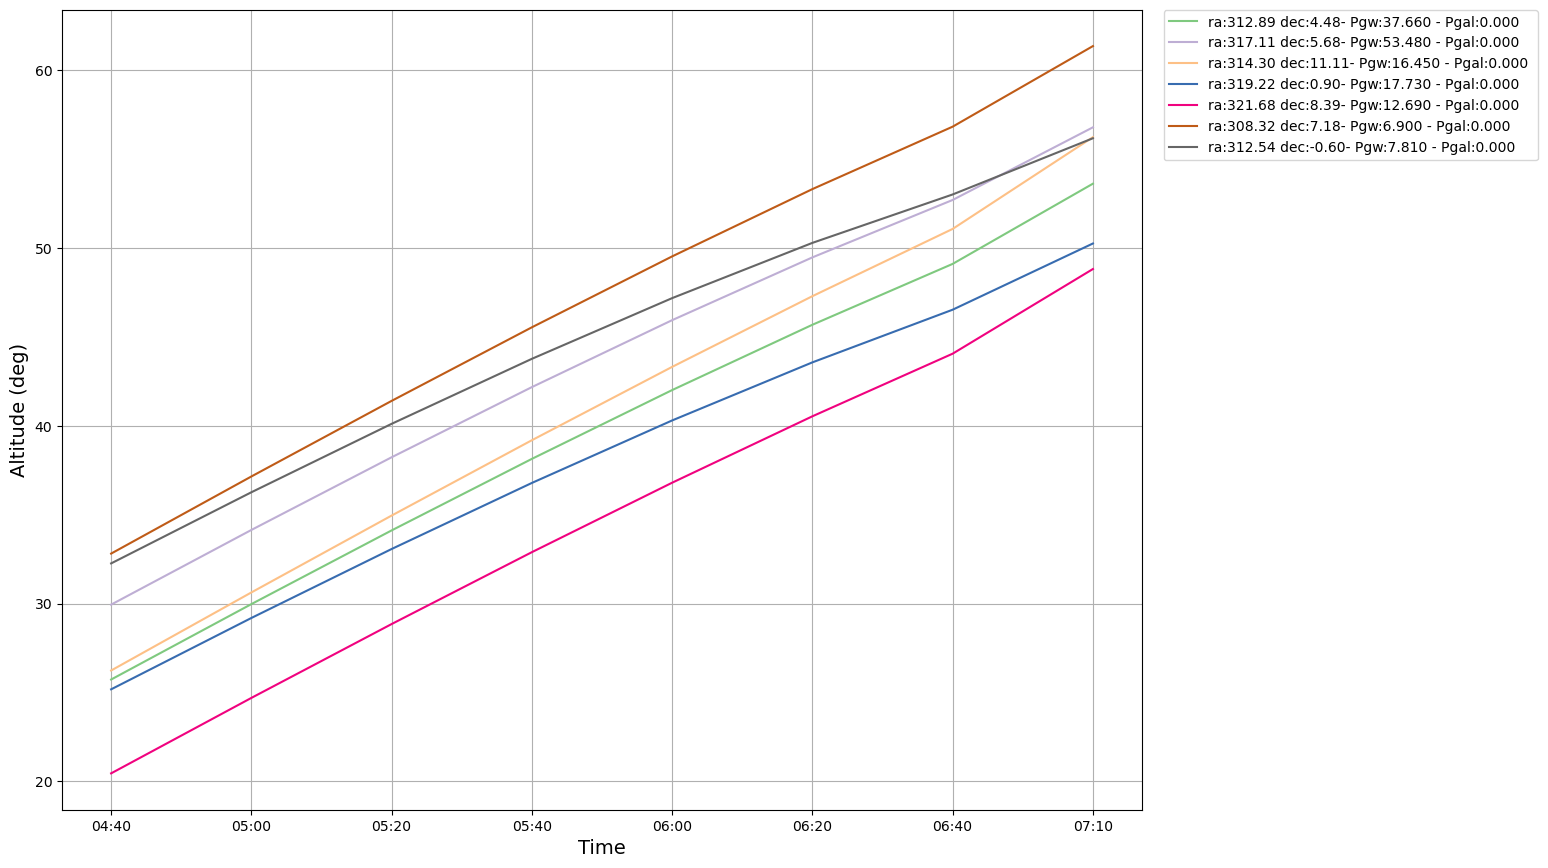

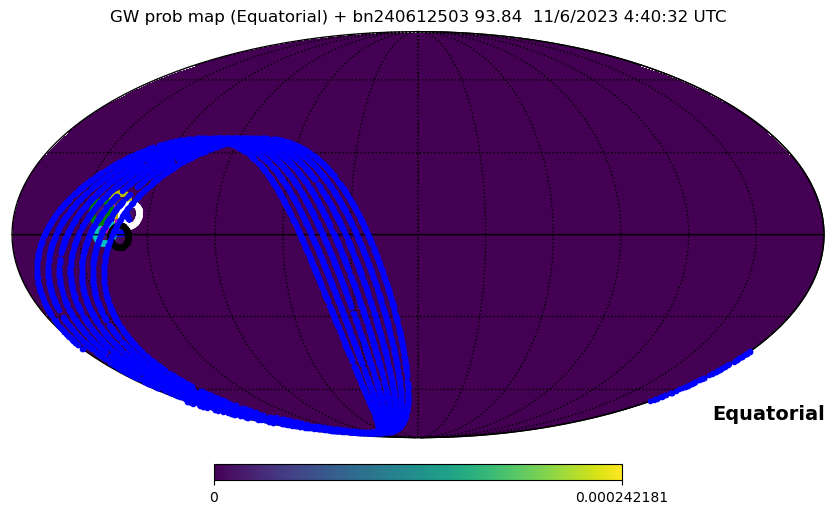

In [ ]:
GetSchedule(obspar)

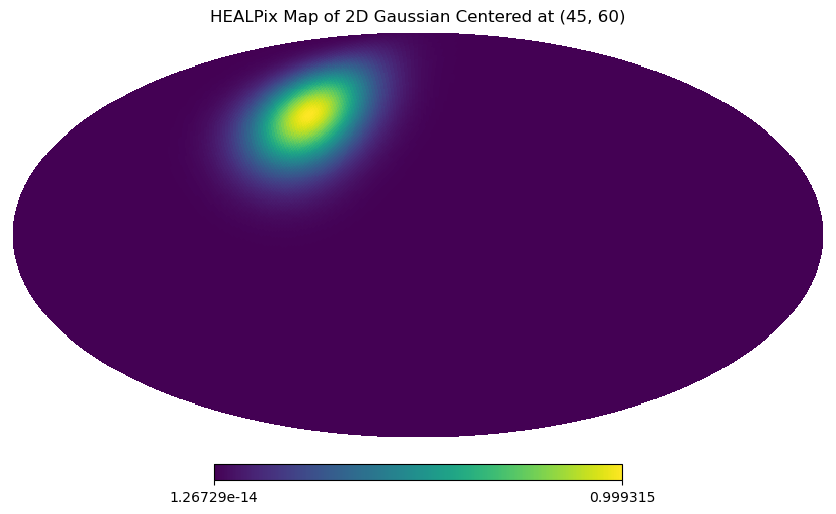

In [ ]:
# First ideas on creating the 2D gaussian from any point-like source 
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Define the number of HEALPix pixels (Nside parameter)
nside = 64
npix = hp.nside2npix(nside)

# Initialize the HEALPix map
healpix_map = np.zeros(npix)

# Define the parameters of the Gaussian
mu = 0  # Not used directly, kept for clarity
sigma = 0.25

# Define the center of the Gaussian in spherical coordinates (latitude, longitude in degrees)
center_lat = 45  # Example latitude in degrees
center_lon = 60  # Example longitude in degrees

# Convert center to Cartesian coordinates
center_theta = np.radians(90 - center_lat)  # theta is colatitude
center_phi = np.radians(center_lon)
center_x = np.sin(center_theta) * np.cos(center_phi)
center_y = np.sin(center_theta) * np.sin(center_phi)
center_z = np.cos(center_theta)

# Fill the HEALPix map with the Gaussian values
for i in range(npix):
    theta, phi = hp.pix2ang(nside, i)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    # Calculate the distance from the center
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2 + (z - center_z)**2)
    
    # Apply the Gaussian function
    healpix_map[i] = np.exp(-0.5 * (distance**2) / sigma**2)

# Visualize the HEALPix map
hp.mollview(healpix_map, title='HEALPix Map of 2D Gaussian Centered at ({}, {})'.format(center_lat, center_lon))
plt.show()
